In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import Button, HBox, VBox
from IPython.display import display
import os

In [2]:
# load images from the "images" dir
emotions = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]
images_per_emotion = 20
images = []
labels = []
for emotion in emotions:
    files = os.listdir("images/%s" % emotion)
    for i in range(images_per_emotion):
        # read grayscale image
        image = plt.imread("images/%s/%s" % (emotion, files[i]), 0)
        images.append(image)
        labels.append(emotion)
        
        
# scramble the images and labels
images = np.array(images)
labels = np.array(labels)
randomize = np.arange(len(images))
np.random.shuffle(randomize)
images = images[randomize]
labels = labels[randomize]

In [3]:
blood_pressure = None
heart_rate = None
i = 0
blood_pressures = []
heart_rates = []

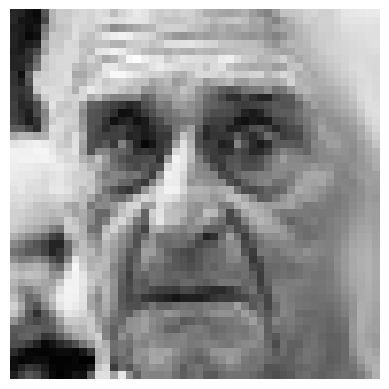

Textarea(value='', description='Blood pressure:', placeholder='Blood pressure')

Textarea(value='', description='Heart rate:', placeholder='Heart rate')

In [73]:
if i >= len(images):
    print("Done!")
    exit()
time.sleep(5)
if blood_pressure is not None:
    blood_pressures.append(blood_pressure.value)
if heart_rate is not None:
    heart_rates.append(heart_rate.value)

fig, ax = plt.subplots()
ax.imshow(images[i], cmap="gray")
#ax.set_title(labels[i])
ax.axis("off")
plt.show()

blood_pressure = widgets.Textarea(
    value='',
    placeholder='Blood pressure',
    description='Blood pressure:',
    disabled=False
)
# show input for heart rate
heart_rate = widgets.Textarea(
    value='',
    placeholder='Heart rate',
    description='Heart rate:',
    disabled=False
)

time.sleep(4)
display(blood_pressure)
display(heart_rate)
i += 1







In [7]:









print(heart_rates)
print(blood_pressures)

['23', '2']
['34', '43']


In [8]:
data = pd.DataFrame({"label": labels[:len(blood_pressures)], "blood_pressure": blood_pressures, "heart_rate": heart_rates})
data.to_csv("data.csv", index=False)